<a href="https://colab.research.google.com/github/Jinyong-20/Machine_Learning_Programming/blob/master/lesson2_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *

▲ 필요한 함수들 임포트

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


▲ 드라이브에 마운트

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [0]:
n=100

In [15]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.3637,  1.0000],
        [ 0.6516,  1.0000],
        [ 0.4715,  1.0000],
        [ 0.3542,  1.0000],
        [-0.7819,  1.0000]])

▲  1을 원소로 같는 tensor형 변수 생성(행렬과 유사함) 2개씩 100개
uniform을 통해 -1에서 1사이의 균일 난수(_)를 앞의 원소에 저장

In [0]:
torch.ones??

In [0]:
uniform??

In [16]:
a = tensor(3.,2); a

tensor([3., 2.])

▲ tensor형을 직접 초기화

In [0]:
y = x@a + torch.rand(n)

▲ x와 a에 대해서 행렬곱 연산을 수행하고 100이내의 랜덤 tensor를 더해준 값을 y로 저장

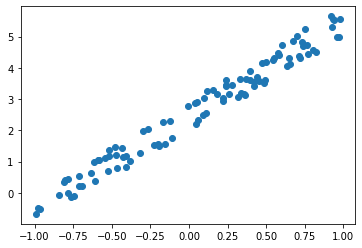

In [20]:
plt.scatter(x[:,0], y);

▲ 산포도를 출력
Q. pit.scatter??

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

▲ mse라는 이름의 함수를 정의한다. 인자에 대하여 두 인자의 차의 제곱의 평균을 반환하는 기능을 수행한다(평균 제곱 오차)

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [27]:
a = tensor(-1.,1)
a.type()

'torch.FloatTensor'

▲ 자동으로 실수화되는 tensor

In [28]:
y_hat = x@a
mse(y_hat, y)

tensor(8.2534)

▲ 값이 변한 a와 x와의 행렬 연산 결과를 y^으로 저장한다.
이후 mse(평균제곱오차)를 구한다

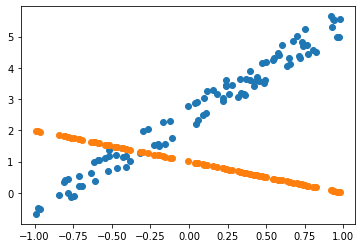

In [29]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

▲ 두 변수의 산포도를 출력한다

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [31]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

▲ tensor a를 통해 파라미터 생성

In [36]:
doc(nn.Parameter)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

▲ y^을 x와a의 행렬곱(예측)으로, 손실을 제곱평균 오차로 계산하고 일정 주기로 손실을 출력하고(t=횟수), 손실을 미분하여 그라디언트를 계산하는 함수 update를 사용자 정의. 손실을 줄이기 위해 a에서 그라디언트를 빼서 a를 업데이트

In [38]:
lr = 1e-1
for t in range(100): update()

tensor(8.2534, grad_fn=<MeanBackward0>)
tensor(1.3578, grad_fn=<MeanBackward0>)
tensor(0.4222, grad_fn=<MeanBackward0>)
tensor(0.1765, grad_fn=<MeanBackward0>)
tensor(0.1094, grad_fn=<MeanBackward0>)
tensor(0.0910, grad_fn=<MeanBackward0>)
tensor(0.0860, grad_fn=<MeanBackward0>)
tensor(0.0846, grad_fn=<MeanBackward0>)
tensor(0.0842, grad_fn=<MeanBackward0>)
tensor(0.0841, grad_fn=<MeanBackward0>)


▲ 1e-1의 학습율로, 100번 업데이트(10회마다 출력)

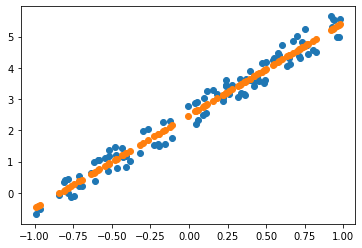

In [41]:
plt.scatter(x[:,0],y)
with torch.no_grad():
    plt.scatter(x[:,0],x@a);

▲ x와y, x와y^의 산포도를 출력

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [44]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
with torch.no_grad():
    line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    with torch.no_grad():
        line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

▲ y^을 그라디언트 계산을 통해 예측과 일치시키는 과정을 애니메이션으로 보여준다

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.

In [0]:
def update():
    y_hat = x[rand_idx]@a
    loss = mse(y[rand_idx], y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

▲ 임의의 인덱스에 대하여 그라디언트 계산을 수행 = SGD(Mini-batch(랜덤 포인트사용)를 쓰는 접근방식의 그라디언트 하강)